
## 참조자료

https://pinkwink.kr/1119

# 1. 타이타닉 데이터 읽어오기

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('dataset/titanic.csv', encoding='utf-8')

In [3]:
titanic.shape

(887, 8)

In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## 성별을 숫자로 변환하기

In [5]:
titanic['Sex'] = titanic['Sex'].str.replace('female',"1")
titanic['Sex'] = titanic['Sex'].str.replace('male','0.')

In [6]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0.,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0.,35.0,0,0,8.0500


In [7]:
titanic['Sex'].value_counts()

0.    573
1     314
Name: Sex, dtype: int64

In [8]:
titanic['Sex'] = titanic['Sex'].astype('float')

In [9]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0.0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1.0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1.0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1.0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0.0,35.0,0,0,8.0500


## 정수를 실수로 변환하기

In [10]:
titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                        float64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [11]:
titanic['Survived'] = titanic['Survived'].astype('float')
titanic['Pclass'] = titanic['Pclass'].astype('float')


In [12]:
titanic.dtypes

Survived                   float64
Pclass                     float64
Name                        object
Sex                        float64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [13]:
titanic.values

array([[0.0, 3.0, 'Mr. Owen Harris Braund', ..., 1, 0, 7.25],
       [1.0, 1.0, 'Mrs. John Bradley (Florence Briggs Thayer) Cumings',
        ..., 1, 0, 71.2833],
       [1.0, 3.0, 'Miss. Laina Heikkinen', ..., 0, 0, 7.925],
       ...,
       [0.0, 3.0, 'Miss. Catherine Helen Johnston', ..., 1, 2, 23.45],
       [1.0, 1.0, 'Mr. Karl Howell Behr', ..., 0, 0, 30.0],
       [0.0, 3.0, 'Mr. Patrick Dooley', ..., 0, 0, 7.75]], dtype=object)

## 학습 및 테스트 데이터로 분리하기

   pclass , Sex, Age, Fare를 가지고 구하기 

In [14]:
x_data = titanic.values[:, [1,3,7]]
y_data = titanic.values[:, [0]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.1, random_state=7)

In [15]:
X_train.shape

(798, 3)

In [16]:
X_test.shape

(89, 3)

# 2. 모델 만들기

In [17]:
import keras

Using TensorFlow backend.


In [18]:
keras.__version__

'2.3.1'

In [19]:
import tensorflow as tf 

In [20]:
tf.keras.__version__

'2.2.4-tf'

In [21]:
from keras import  models
from keras import  layers

## 히든 1, 출력 1로 정의하기

In [22]:
model = models.Sequential()

In [23]:
model.add(layers.Dense(255, activation='relu', input_shape=(3,)))

In [24]:
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 255)               1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 256       
Total params: 1,276
Trainable params: 1,276
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

## 학습하기

In [27]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Train on 798 samples, validate on 89 samples
Epoch 1/500
798/798 [==============================] - 0s 168us/step - loss: 1.0351 - accuracy: 0.5514 - val_loss: 0.7123 - val_accuracy: 0.5843
Epoch 2/500
798/798 [==============================] - 0s 31us/step - loss: 0.6817 - accuracy: 0.6203 - val_loss: 0.6321 - val_accuracy: 0.5843
Epoch 3/500
798/798 [==============================] - 0s 31us/step - loss: 0.5787 - accuracy: 0.6905 - val_loss: 0.5340 - val_accuracy: 0.7191
Epoch 4/500
798/798 [==============================] - 0s 31us/step - loss: 0.5495 - accuracy: 0.7268 - val_loss: 0.5089 - val_accuracy: 0.7640
Epoch 5/500
798/798 [==============================] - 0s 28us/step - loss: 0.5370 - accuracy: 0.7481 - val_loss: 0.4952 - val_accuracy: 0.7978
Epoch 6/500
798/798 [==============================] - 0s 27us/step - loss: 0.5193 - accuracy: 0.7744 - val_loss: 0.4705 - val_accuracy: 0.7753
Epoch 7/500
798/798 [==============================] - 0s 27us/step - loss: 0.5297 - accur

798/798 [==============================] - 0s 29us/step - loss: 0.5294 - accuracy: 0.7657 - val_loss: 0.4803 - val_accuracy: 0.7753
Epoch 58/500
798/798 [==============================] - 0s 29us/step - loss: 0.5356 - accuracy: 0.7481 - val_loss: 0.4323 - val_accuracy: 0.7978
Epoch 59/500
798/798 [==============================] - 0s 29us/step - loss: 0.5011 - accuracy: 0.7694 - val_loss: 0.4200 - val_accuracy: 0.8315
Epoch 60/500
798/798 [==============================] - 0s 29us/step - loss: 0.4887 - accuracy: 0.7669 - val_loss: 0.4191 - val_accuracy: 0.7978
Epoch 61/500
798/798 [==============================] - 0s 28us/step - loss: 0.4790 - accuracy: 0.7769 - val_loss: 0.4205 - val_accuracy: 0.8315
Epoch 62/500
798/798 [==============================] - 0s 29us/step - loss: 0.4757 - accuracy: 0.7794 - val_loss: 0.4129 - val_accuracy: 0.8090
Epoch 63/500
798/798 [==============================] - 0s 30us/step - loss: 0.4854 - accuracy: 0.7719 - val_loss: 0.4580 - val_accuracy: 0.820

798/798 [==============================] - 0s 29us/step - loss: 0.4874 - accuracy: 0.7782 - val_loss: 0.4073 - val_accuracy: 0.8315
Epoch 114/500
798/798 [==============================] - 0s 29us/step - loss: 0.4657 - accuracy: 0.7870 - val_loss: 0.4071 - val_accuracy: 0.8315
Epoch 115/500
798/798 [==============================] - 0s 29us/step - loss: 0.4666 - accuracy: 0.7845 - val_loss: 0.4066 - val_accuracy: 0.8090
Epoch 116/500
798/798 [==============================] - 0s 29us/step - loss: 0.4673 - accuracy: 0.7882 - val_loss: 0.4076 - val_accuracy: 0.8090
Epoch 117/500
798/798 [==============================] - 0s 29us/step - loss: 0.4687 - accuracy: 0.7820 - val_loss: 0.4133 - val_accuracy: 0.8427
Epoch 118/500
798/798 [==============================] - 0s 29us/step - loss: 0.4710 - accuracy: 0.7845 - val_loss: 0.4281 - val_accuracy: 0.8315
Epoch 119/500
798/798 [==============================] - 0s 29us/step - loss: 0.4946 - accuracy: 0.7669 - val_loss: 0.4070 - val_accuracy:

798/798 [==============================] - 0s 28us/step - loss: 0.4641 - accuracy: 0.7982 - val_loss: 0.4186 - val_accuracy: 0.7978
Epoch 170/500
798/798 [==============================] - 0s 28us/step - loss: 0.4789 - accuracy: 0.7782 - val_loss: 0.3967 - val_accuracy: 0.8427
Epoch 171/500
798/798 [==============================] - 0s 29us/step - loss: 0.4691 - accuracy: 0.7895 - val_loss: 0.4155 - val_accuracy: 0.8315
Epoch 172/500
798/798 [==============================] - 0s 27us/step - loss: 0.4629 - accuracy: 0.7945 - val_loss: 0.4356 - val_accuracy: 0.8202
Epoch 173/500
798/798 [==============================] - 0s 27us/step - loss: 0.4689 - accuracy: 0.7895 - val_loss: 0.4128 - val_accuracy: 0.7865
Epoch 174/500
798/798 [==============================] - 0s 27us/step - loss: 0.4816 - accuracy: 0.7870 - val_loss: 0.4017 - val_accuracy: 0.8315
Epoch 175/500
798/798 [==============================] - 0s 28us/step - loss: 0.4649 - accuracy: 0.7832 - val_loss: 0.3952 - val_accuracy:

798/798 [==============================] - 0s 27us/step - loss: 0.4532 - accuracy: 0.8045 - val_loss: 0.3884 - val_accuracy: 0.8315
Epoch 226/500
798/798 [==============================] - 0s 27us/step - loss: 0.4603 - accuracy: 0.7845 - val_loss: 0.3925 - val_accuracy: 0.8090
Epoch 227/500
798/798 [==============================] - 0s 28us/step - loss: 0.4527 - accuracy: 0.8020 - val_loss: 0.3920 - val_accuracy: 0.8202
Epoch 228/500
798/798 [==============================] - 0s 27us/step - loss: 0.4611 - accuracy: 0.7970 - val_loss: 0.3883 - val_accuracy: 0.8315
Epoch 229/500
798/798 [==============================] - 0s 27us/step - loss: 0.4532 - accuracy: 0.7945 - val_loss: 0.3875 - val_accuracy: 0.8315
Epoch 230/500
798/798 [==============================] - 0s 26us/step - loss: 0.4560 - accuracy: 0.8008 - val_loss: 0.3927 - val_accuracy: 0.8090
Epoch 231/500
798/798 [==============================] - 0s 27us/step - loss: 0.4533 - accuracy: 0.7995 - val_loss: 0.4066 - val_accuracy:

Epoch 281/500
798/798 [==============================] - 0s 27us/step - loss: 0.4518 - accuracy: 0.7970 - val_loss: 0.3806 - val_accuracy: 0.8315
Epoch 282/500
798/798 [==============================] - 0s 28us/step - loss: 0.4507 - accuracy: 0.8008 - val_loss: 0.3877 - val_accuracy: 0.8090
Epoch 283/500
798/798 [==============================] - 0s 27us/step - loss: 0.4633 - accuracy: 0.7995 - val_loss: 0.3909 - val_accuracy: 0.7978
Epoch 284/500
798/798 [==============================] - 0s 27us/step - loss: 0.4659 - accuracy: 0.7932 - val_loss: 0.3929 - val_accuracy: 0.8315
Epoch 285/500
798/798 [==============================] - 0s 27us/step - loss: 0.4533 - accuracy: 0.8008 - val_loss: 0.3856 - val_accuracy: 0.8315
Epoch 286/500
798/798 [==============================] - 0s 27us/step - loss: 0.4564 - accuracy: 0.7870 - val_loss: 0.4015 - val_accuracy: 0.8315
Epoch 287/500
798/798 [==============================] - 0s 27us/step - loss: 0.4534 - accuracy: 0.7920 - val_loss: 0.3938 -

798/798 [==============================] - 0s 27us/step - loss: 0.4474 - accuracy: 0.7970 - val_loss: 0.3813 - val_accuracy: 0.8315
Epoch 338/500
798/798 [==============================] - 0s 29us/step - loss: 0.4486 - accuracy: 0.8020 - val_loss: 0.3801 - val_accuracy: 0.8315
Epoch 339/500
798/798 [==============================] - 0s 27us/step - loss: 0.4470 - accuracy: 0.7932 - val_loss: 0.3927 - val_accuracy: 0.8202
Epoch 340/500
798/798 [==============================] - 0s 26us/step - loss: 0.4494 - accuracy: 0.7970 - val_loss: 0.3782 - val_accuracy: 0.8315
Epoch 341/500
798/798 [==============================] - 0s 27us/step - loss: 0.4714 - accuracy: 0.7907 - val_loss: 0.4137 - val_accuracy: 0.8090
Epoch 342/500
798/798 [==============================] - 0s 28us/step - loss: 0.4546 - accuracy: 0.7907 - val_loss: 0.3789 - val_accuracy: 0.8315
Epoch 343/500
798/798 [==============================] - 0s 27us/step - loss: 0.4489 - accuracy: 0.7995 - val_loss: 0.3877 - val_accuracy:

798/798 [==============================] - 0s 28us/step - loss: 0.4497 - accuracy: 0.7957 - val_loss: 0.3812 - val_accuracy: 0.8090
Epoch 394/500
798/798 [==============================] - 0s 27us/step - loss: 0.4479 - accuracy: 0.7945 - val_loss: 0.3786 - val_accuracy: 0.8315
Epoch 395/500
798/798 [==============================] - 0s 27us/step - loss: 0.4509 - accuracy: 0.7920 - val_loss: 0.3782 - val_accuracy: 0.8202
Epoch 396/500
798/798 [==============================] - 0s 27us/step - loss: 0.4438 - accuracy: 0.7970 - val_loss: 0.3863 - val_accuracy: 0.8202
Epoch 397/500
798/798 [==============================] - 0s 27us/step - loss: 0.4544 - accuracy: 0.7857 - val_loss: 0.3840 - val_accuracy: 0.8315
Epoch 398/500
798/798 [==============================] - 0s 27us/step - loss: 0.4466 - accuracy: 0.7920 - val_loss: 0.3827 - val_accuracy: 0.8315
Epoch 399/500
798/798 [==============================] - 0s 27us/step - loss: 0.4484 - accuracy: 0.7970 - val_loss: 0.3883 - val_accuracy:

798/798 [==============================] - 0s 27us/step - loss: 0.4551 - accuracy: 0.8045 - val_loss: 0.3823 - val_accuracy: 0.8315
Epoch 450/500
798/798 [==============================] - 0s 27us/step - loss: 0.4538 - accuracy: 0.7957 - val_loss: 0.3850 - val_accuracy: 0.8315
Epoch 451/500
798/798 [==============================] - 0s 27us/step - loss: 0.4462 - accuracy: 0.7907 - val_loss: 0.3847 - val_accuracy: 0.8315
Epoch 452/500
798/798 [==============================] - 0s 27us/step - loss: 0.4472 - accuracy: 0.7895 - val_loss: 0.3800 - val_accuracy: 0.8315
Epoch 453/500
798/798 [==============================] - 0s 27us/step - loss: 0.4478 - accuracy: 0.8058 - val_loss: 0.3822 - val_accuracy: 0.8315
Epoch 454/500
798/798 [==============================] - 0s 27us/step - loss: 0.4476 - accuracy: 0.7932 - val_loss: 0.3841 - val_accuracy: 0.8315
Epoch 455/500
798/798 [==============================] - 0s 27us/step - loss: 0.4529 - accuracy: 0.7945 - val_loss: 0.3790 - val_accuracy:

## 학습 데이터 결과 그래프 그리기

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

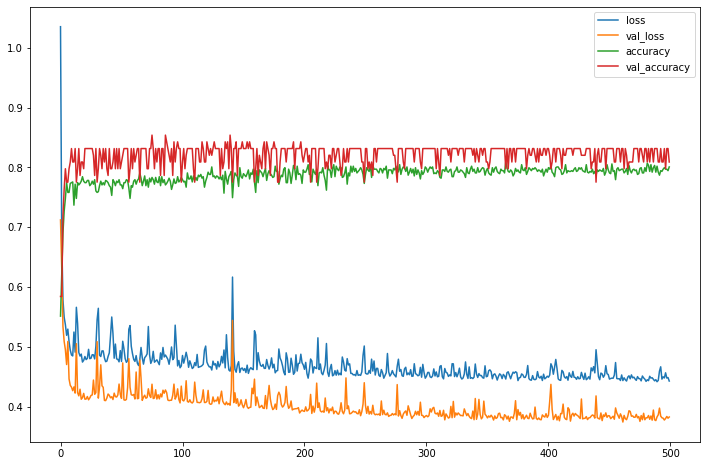

In [29]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()

## 평가하기

In [30]:
model.evaluate(X_test, y_test)

89/89 [==============================] - 0s 34us/step


[0.3828300217564186, 0.8089887499809265]

In [31]:
a = model.predict(X_test)

In [32]:
import numpy as np

In [33]:
np.max(a, axis=1)

array([0.9105331 , 0.14713946, 0.19065851, 0.15032256, 0.5047006 ,
       0.12202081, 0.9074135 , 0.23983258, 0.8531593 , 0.12495393,
       0.8531593 , 0.14747822, 0.40406743, 0.9717772 , 0.29163587,
       0.9724295 , 0.12495393, 0.20361328, 0.8466817 , 0.12495393,
       0.3752898 , 0.39342755, 0.38093412, 0.20148775, 0.63791454,
       0.14896265, 0.37527448, 0.06276253, 0.11976457, 0.63791454,
       0.40492785, 0.37457702, 0.14658588, 0.96803594, 0.06787744,
       0.1618031 , 0.9580265 , 0.11253303, 0.49958122, 0.97818506,
       0.98042005, 0.11976457, 0.09691915, 0.02055299, 0.10303229,
       0.11930218, 0.489057  , 0.3907383 , 0.09235969, 0.63791454,
       0.16204423, 0.38235277, 0.19065851, 0.90172505, 0.20556733,
       0.07711971, 0.10602188, 0.97967136, 0.12015051, 0.374662  ,
       0.38810635, 0.11930218, 0.37672997, 0.8494614 , 0.9879296 ,
       0.2918527 , 0.40828955, 0.40423545, 0.6273172 , 0.3376717 ,
       0.50138265, 0.12202081, 0.97967136, 0.20792428, 0.85263

In [34]:
X_test[1]

array([3.0, 0.0, 29.125], dtype=object)

In [35]:
y_test[1]

array([0.0], dtype=object)

In [36]:
a[1]

array([0.14713946], dtype=float32)

## 임의의 결과를 넣고 예측하기

In [38]:
dicaprio = np.array([3., 0., 5.]).reshape(1,3)
winslet = np.array([1., 1., 100.]).reshape(1,3)

In [39]:
model.predict(dicaprio)

array([[0.03742997]], dtype=float32)

In [40]:
model.predict(winslet)

array([[0.97518015]], dtype=float32)